In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bootcamp 1: Predicting Titanic Survivors with Logistic Regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is one of the most popular machine learning algorithms for binary classification. The goal of binary classification is to categorize data points into one of two groups: 0 or 1, true or false, to survive or not to survive, male or female, etc. Logistic regression performs very well on linearly separable classes.

In this bootcamp, we'll learn:

* understand Logistic Regression
* pre-process data and create data visualizations
* create a binary classification model using Logistic Regression that predicts which passengers survived the Titanic shipwreck
* apply your knowledge to a different dataset: Breast Cancer data



## Understanding Logistic Regression

![alt text](https://drive.google.com/uc?id=1wJcIP-RaZ_QiRncgkQHxQW1g0gglrMrK)

source: [https://github.com/llSourcell/logistic_regression/blob/master/Sentiment%20analysis%20with%20Logistic%20Regression.ipynb](https://github.com/llSourcell/logistic_regression/blob/master/Sentiment%20analysis%20with%20Logistic%20Regression.ipynb)

Input: Datapoints with several features (independent variables)

Output: Probabilities of binary classes between 0 and 1

In order to squash the net input in the range of [0,1], we need to use the sigmoid function.

What sigmoid function does is that it transforms large inputs into a value close to 1 and small inputs into a value to close to 0.

![sigmoid](https://drive.google.com/uc?id=1jWh3YJRwWxg-CBDo4yParRfkxhBZvAnI)

source: [https://en.wikipedia.org/wiki/Sigmoid_function](https://en.wikipedia.org/wiki/Sigmoid_function)

The sigmoid function is defined by:

### $Sigmoid(x) = \frac{1}{1+e^{-x}}$

We will do this for every sample in our training set and compute the errors. To calculate the error we only need to compare our prediction with the true label for each sample. We will use the cross entropy loss function.





### $Cost(\hat{y},y) = -y log(\hat{y})-(1-y)log(\hat{y})$

A cost function is then something we want to minimize. Gradient descent is a method for finding the minimum of a function of multiple variables, such like the one we're dealing with here.

![gradient descent](https://drive.google.com/uc?id=1ENmm3VCDmHso5bf72fZrJQ6MSarsDGPP)
source: [https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11)

For more details on Logistic Regression, I highly recommend taking this [online deep learning course](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning).

## Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Data

This dataset comes from [Kaggle.com](https://kaggle.com), a popular website for data science competitions. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
df = pd.read_csv("drive/My Drive/Data Science Bootcamp/Bootcamp 1: Logistic Regression/titanic_train.csv")

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Variable Definitions
![variable description](https://drive.google.com/uc?id=1nLZsdY13lLAk7eQI3aaclMy4UrIQ0tKY)

## Data Pre-processing
Drop the column 'Cabin' since it contains too many null values and drop any rows with null values. We will also drop other irrelevant columns such as 'Name,''Ticket,''Embarked.'

In [0]:
df.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 50.2+ KB


Here, we'll convert category independent variables to numeric variables.

In [0]:
df['Sex'] = df.Sex.apply(lambda x: 0 if x == "female" else 1)# this code is to convert the categorical data type to numerical data type
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1),df['Survived'], test_size = 0.2)

In [0]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
18,19,3,0,31.0,1,0,18.0000
498,499,1,0,25.0,1,2,151.5500
621,622,1,1,42.0,1,0,52.5542
291,292,1,0,19.0,1,0,91.0792
421,422,3,1,21.0,0,0,7.7333


In [0]:
y_train.head()

18     0
498    0
621    1
291    1
421    0
Name: Survived, dtype: int64

## Data Visualization

Let's first make a bar chart to see how many passengers survived or died. We'll use [seaborn](https://seaborn.pydata.org/), a data visualization library for drawing attractive and informative statistical graphics in Python.

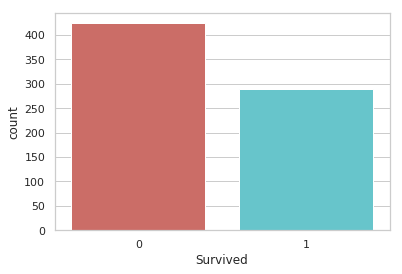

In [0]:
sns.countplot(x='Survived', data=df, palette='hls')

Let's now a bar chart the compares the number of male and female passegers who survived.

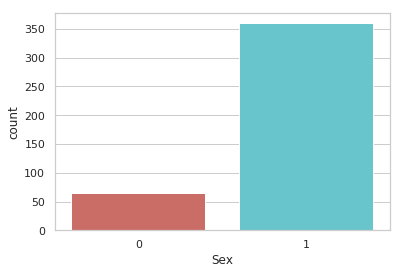

In [0]:
# a bar chart the compares the number of male and female passegers who survived.
# edit code here.
sns.countplot(x='Sex', data=df[df['Survived'] == 0], palette='hls')

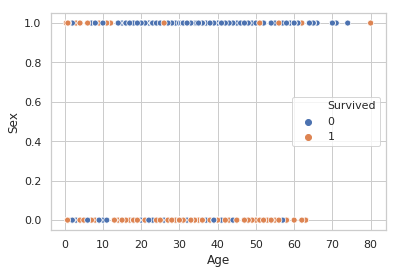

In [0]:
sns.scatterplot(x='Age',y='Sex',hue='Survived',data=df)

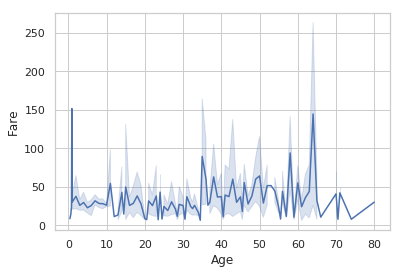

In [0]:
sns.lineplot(x='Age', y='Fare', data=df)

## Creating a Logistic Regression Model

We'll use scikit-learn, a free machine learning library in Python, to create a logistic regression model.

In [0]:
# import LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

# creates an instance of the model object
logreg = LogisticRegression()

# fit the model with training data with labels
logreg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Once the model is trained we want to find out how well the model is performing, so we test the model. We use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 

In [0]:
y_pred = logreg.predict(x_test)
y_pred

array(['B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B'], dtype=object)

Once predicted we save that outcome in "y_pred" variable. Then we compare the predicted value("y_pred") and actual value("y_test") to see how well our model is performing. We will measure the performance of our model using accuracy.

### $Accuracy = \frac{TP + TN}{TP+TN+FP+FN}$

True Positive (TP):


*   Reality: Survived
*   Prediction: Survived

True Negative (TN):



*   Reality: Survived
*   Prediction: Survived

False Positive (TN):



*   Reality: Not Survived
*   Prediction: Survived

False Negative (TN):



*   Reality: Survived
*   Prediction: Not Survived





In [0]:
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.886


## Let's Try With Another Dataset!

We'll now apply our knowledge learned to the Breast Cancer Dataset.

In [0]:
# import dataset
df = pd.read_csv("drive/My Drive/Data Science Bootcamp/Bootcamp 1: Logistic Regression/breast_cancer_data.csv")

In [0]:
# choose only relevent subset of the dataset
df.head(5)

In [0]:
df_small = df[['radius_mean', 'texture_mean','perimeter_mean']]
df_small.head()

,radius_mean,texture_mean,perimeter_mean
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10


In [45]:
df['diagnosis'] = df.diagnosis.apply(lambda x: 0 if x == "B" else 1)# this code is to convert the categorical data type to numerical data type
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [46]:
# create and train logistic regression model
x_train, x_test, y_train, y_test = train_test_split(df_small,df['diagnosis'], test_size = 0.2)
x_train.head()

,radius_mean,texture_mean,perimeter_mean
373,20.64,17.35,134.80
457,13.21,25.25,84.10
496,12.65,18.17,82.69
156,17.68,20.74,117.40
418,12.70,12.17,80.88


In [47]:
# measure performance with accuracy
y_pred = logreg.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0])

In [48]:
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.307
